In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import LambdaCallback
import numpy as np

# 데이터 로드
tf.random.set_seed(3)

df=pd.read_csv("drive/MyDrive/Colab Notebooks/Admission_Predict.csv")
X = df.iloc[:, 1:8]
Y = df.iloc[:, 9]

# 데이터 전처리
X_scaled= MinMaxScaler().fit_transform(X)

# 훈련셋, 시험셋 나누기
train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y, test_size=0.1, random_state=35)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=35)

weight1=[]
weight2=[]
weight3=[]
weight4=[]
weight5=[]
weight6=[]
weight11=[]
weight22=[]
weight33=[]
weight44=[]
weight55=[]
weight66=[]

optimizer = keras.optimizers.Adam()
loss_fn=keras.losses.BinaryCrossentropy()
initializer = keras.initializers.glorot_uniform()
layer1 = keras.layers.Dense(5, activation='softsign', input_dim=7, kernel_initializer=initializer, bias_initializer='zeros')
layer2 = keras.layers.Dense(5, activation='softsign', kernel_initializer=initializer, bias_initializer='zeros')
layer3 = keras.layers.Dense(5, activation='softsign', kernel_initializer=initializer, bias_initializer='zeros')
layer4 = keras.layers.Dense(5, activation='softsign', kernel_initializer=initializer, bias_initializer='zeros')
layer5 = keras.layers.Dense(5, activation='softsign', kernel_initializer=initializer, bias_initializer='zeros')
layer6 = keras.layers.Dense(1, activation='sigmoid')

# 가중치 초기화 설정

model = keras.Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

apd_batch_weights1 = LambdaCallback(on_batch_end=lambda epoch, logs: weight11.append(model.layers[0].get_weights()))
apd_batch_weights2 = LambdaCallback(on_batch_end=lambda epoch, logs: weight22.append(model.layers[1].get_weights()))
apd_batch_weights3 = LambdaCallback(on_batch_end=lambda epoch, logs: weight33.append(model.layers[2].get_weights()))
apd_batch_weights4 = LambdaCallback(on_batch_end=lambda epoch, logs: weight44.append(model.layers[3].get_weights()))
apd_batch_weights5 = LambdaCallback(on_batch_end=lambda epoch, logs: weight55.append(model.layers[4].get_weights()))
apd_batch_weights6 = LambdaCallback(on_batch_end=lambda epoch, logs: weight66.append(model.layers[5].get_weights()))

apd_weights1 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight1.append(model.layers[0].get_weights()))
apd_weights2 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight2.append(model.layers[1].get_weights()))
apd_weights3 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight3.append(model.layers[2].get_weights()))
apd_weights4 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight4.append(model.layers[3].get_weights()))
apd_weights5 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight5.append(model.layers[4].get_weights()))
apd_weights6 = LambdaCallback(on_epoch_end=lambda epoch, logs: weight6.append(model.layers[5].get_weights()))

history=model.fit(train_input, train_target, epochs=140,
                     batch_size=10, validation_data=(val_input, val_target),callbacks=[apd_batch_weights1,apd_batch_weights2,apd_batch_weights3,apd_batch_weights4,apd_batch_weights5,apd_weights1,apd_weights2,apd_weights3,apd_weights4,apd_weights5])

# 모델 평가
model.evaluate(test_input, test_target)

# 시그모이드 함수
def sigmoid(z):
  return 1/(1+np.exp(-z))

# 하이퍼볼릭 탄젠트 함수
def tanh(z):
  return (1-np.exp(-z))/(1+np.exp(-z))

# 소프트사인 함수
def softsign(z):
  return z/(1+abs(z))

"""# 정확도, 손실 그래프 그리기
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

loss_ax = plt.subplot()
acc_ax = loss_ax.twinx()

loss_ax.plot(epochs, loss, 'y', label='Training loss')
loss_ax.plot(epochs, val_loss, 'r', label='validation loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(epochs, acc, 'b', label='Training acc')
acc_ax.plot(epochs, val_acc, 'g', label='validation acc')
acc_ax.legend(loc='upper right')

plt.title('Accuracy and loss changes with epochs')
loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')
plt.show()"""

Epoch 1/140
29/29 [==============================] - 1s 17ms/step - loss: 0.6784 - accuracy: 0.6771 - val_loss: 0.6729 - val_accuracy: 0.6250
Epoch 2/140
29/29 [==============================] - 0s 8ms/step - loss: 0.6549 - accuracy: 0.6771 - val_loss: 0.6617 - val_accuracy: 0.6250
Epoch 3/140
29/29 [==============================] - 0s 8ms/step - loss: 0.6393 - accuracy: 0.6771 - val_loss: 0.6533 - val_accuracy: 0.6250
Epoch 4/140
29/29 [==============================] - 0s 8ms/step - loss: 0.6260 - accuracy: 0.6771 - val_loss: 0.6413 - val_accuracy: 0.6250
Epoch 5/140
29/29 [==============================] - 0s 9ms/step - loss: 0.6093 - accuracy: 0.6771 - val_loss: 0.6217 - val_accuracy: 0.6250
Epoch 6/140
29/29 [==============================] - 0s 7ms/step - loss: 0.5873 - accuracy: 0.6771 - val_loss: 0.5965 - val_accuracy: 0.6250
Epoch 7/140
29/29 [==============================] - 0s 7ms/step - loss: 0.5650 - accuracy: 0.6771 - val_loss: 0.5767 - val_accuracy: 0.6250
Epoch 8/140


"# 정확도, 손실 그래프 그리기\nimport matplotlib.pyplot as plt\n\nhistory_dict = history.history\n\nacc = history_dict['accuracy']\nval_acc = history_dict['val_accuracy']\nloss = history_dict['loss']\nval_loss = history_dict['val_loss']\n\nepochs = range(1, len(loss)+1)\n\nloss_ax = plt.subplot()\nacc_ax = loss_ax.twinx()\n\nloss_ax.plot(epochs, loss, 'y', label='Training loss')\nloss_ax.plot(epochs, val_loss, 'r', label='validation loss')\nloss_ax.legend(loc='upper left')\n\nacc_ax.plot(epochs, acc, 'b', label='Training acc')\nacc_ax.plot(epochs, val_acc, 'g', label='validation acc')\nacc_ax.legend(loc='upper right')\n\nplt.title('Accuracy and loss changes with epochs')\nloss_ax.set_xlabel('Epochs')\nloss_ax.set_ylabel('Loss')\nacc_ax.set_ylabel('Accuracy')\nplt.show()"

In [ ]:
av1=[]
av2=[]
av3=[]
av4=[]
av5=[]
av6=[]
mean1=[]
std1=[]
mean2=[]
std2=[]
mean3=[]
std3=[]
mean4=[]
std4=[]
mean5=[]
std5=[]

for i in range(140):
  av1.append(softsign(train_input@weight1[i][0]+weight1[i][1]))

for i in range(140):
  x1=av1[i].mean(axis=0)
  y1=av1[i].std(axis=0)
  mean1.append(x1.mean(axis=0))
  std1.append(y1.std(axis=0))

In [ ]:
for i in range(140):
  av2.append(softsign(av1[i]@weight2[i][0]+weight2[i][1]))

for i in range(140):
  x2=av2[i].mean(axis=0)
  y2=av2[i].std(axis=0)
  mean2.append(x2.mean(axis=0))
  std2.append(y2.std(axis=0))


In [ ]:
for i in range(140):
  av3.append(softsign(av2[i]@weight3[i][0]+weight3[i][1]))

for i in range(140):
  x3=av3[i].mean(axis=0)
  y3=av3[i].std(axis=0)
  mean3.append(x3.mean(axis=0))
  std3.append(y3.std(axis=0))


In [ ]:
for i in range(140):
  av4.append(softsign(av3[i]@weight4[i][0]+weight4[i][1]))

for i in range(140):
  x4=av4[i].mean(axis=0)
  y4=av4[i].std(axis=0)
  mean4.append(x4.mean(axis=0))
  std4.append(y4.std(axis=0))

for i in range(140):
  av5.append(softsign(av4[i]@weight5[i][0]+weight5[i][1]))

for i in range(140):
  x5=av5[i].mean(axis=0)
  y5=av5[i].std(axis=0)
  mean5.append(x5.mean(axis=0))
  std5.append(y5.std(axis=0))

#for i in range(140):
#  av6.append(softsign(av5[i]@weight6[i][0]+weight6[i][1]))

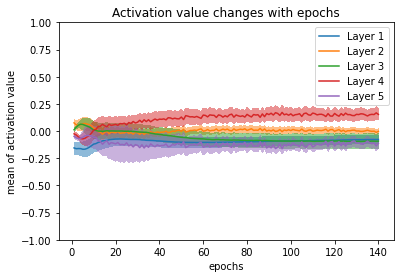

In [ ]:
plt.plot(epochs, mean1)
plt.fill_between(epochs, np.array(mean1)-np.array(std1),np.array(mean1)+np.array(std1),alpha=0.5,linewidth=0, antialiased=False)
plt.plot(epochs, mean2)
plt.fill_between(epochs, np.array(mean2)-np.array(std2),np.array(mean2)+np.array(std2),alpha=0.5,linewidth=-10, antialiased=False)
plt.plot(epochs, mean3)
plt.fill_between(epochs, np.array(mean3)-np.array(std3),np.array(mean3)+np.array(std3),alpha=0.5,linewidth=-10, antialiased=False)
plt.plot(epochs, mean4)
plt.fill_between(epochs, np.array(mean4)-np.array(std4),np.array(mean4)+np.array(std4),alpha=0.5,linewidth=-10, antialiased=False)
plt.plot(epochs, mean5)
plt.fill_between(epochs, np.array(mean5)-np.array(std5),np.array(mean5)+np.array(std5),alpha=0.5,linewidth=-10, antialiased=False)

plt.legend(labels=('Layer 1','Layer 2','Layer 3','Layer 4','Layer 5'))
plt.title('Activation value changes with epochs')
plt.xlabel('epochs')
plt.ylabel('mean of activation value')
plt.ylim(-1,1)
plt.show()

In [8]:
weight1_grad=[]
weight2_grad=[]
weight3_grad=[]
weight4_grad=[]
weight5_grad=[]
w1_grad_mean=[]
w2_grad_mean=[]
w3_grad_mean=[]
w4_grad_mean=[]
w5_grad_mean=[]
w1_grad_std=[]
w2_grad_std=[]
w3_grad_std=[]
w4_grad_std=[]
w5_grad_std=[]

import sympy as sym
for i in range(1):
  mlis=[0];vlis=[0];
  for j in range(7):
    temp1=[]
    for k in range(5):
      temp2=[]
      x=sym.Symbol('x')
      m1=0.9*mlis[i]+0.1*x
      v1=0.999*vlis[i]+0.001*(x**2)
      mm=m1/(1-0.9**(i+1))
      vv=v1/(1-0.999**(i+1))
      equation=weight11[i+1][0][j][k]-weight11[i][0][j][k]+0.001*mm/(sym.sqrt(vv)+1e-8)
      temp2.extend(sym.solvers.solve(equation,x))
      y=sym.solvers.solve(equation,x)
      m2=0.9*mlis[i]+0.1*y[0]
      v2=0.999*vlis[i]+0.001*(y[0]**2)
      mlis.append(m2)
      vlis.append(v2)
    temp1.append(np.mean(temp2))
  weight1_grad.append(np.mean(temp1))

for i in range(140):
  x1=weight1_grad[i][0].mean(axis=0)
  y1=weight1_grad[i][0].std(axis=0)
  w1_grad_mean.append(x1.mean(axis=0))
  w1_grad_std.append(y1.std(axis=0))
"""for i in range(140):
  x1=weight2_grad[i][0].mean(axis=0)
  y1=weight2_grad[i][0].std(axis=0)
  w2_grad_mean.append(x1.mean(axis=0))
  w2_grad_std.append(y1.std(axis=0))
for i in range(140):
  x1=weight3_grad[i][0].mean(axis=0)
  y1=weight3_grad[i][0].std(axis=0)
  w3_grad_mean.append(x1.mean(axis=0))
  w3_grad_std.append(y1.std(axis=0))
for i in range(140):
  x1=weight4_grad[i][0].mean(axis=0)
  y1=weight4_grad[i][0].std(axis=0)
  w4_grad_mean.append(x1.mean(axis=0))
  w4_grad_std.append(y1.std(axis=0))
for i in range(140):
  x1=weight5_grad[i][0].mean(axis=0)
  y1=weight5_grad[i][0].std(axis=0)
  w5_grad_mean.append(x1.mean(axis=0))
  w5_grad_std.append(y1.std(axis=0))"""

IndexError: ignored

In [9]:
equation

0.001*x/(1.0*sqrt(x**2) + 1.0e-8) + 0.000987410545349121

In [10]:
y

[]

In [ ]:
weight1

[[array([[-0.49634582,  0.07446282, -0.0136291 , -0.6862389 ,  0.02828882],
         [ 0.37408635, -0.54471177, -0.24281771,  0.20985341, -0.01168749],
         [-0.53754723,  0.56254816,  0.26378977,  0.07932474, -0.39458194],
         [-0.40860328, -0.54721636, -0.32137325, -0.47944757, -0.17906949],
         [-0.4626172 ,  0.13408552, -0.702006  , -0.20004906,  0.41638485],
         [-0.37345755,  0.60741174,  0.666312  ,  0.27452978,  0.1582562 ],
         [-0.56805694,  0.38471955,  0.48396036,  0.1743598 , -0.69984186]],
        dtype=float32),
  array([ 0.02201235, -0.02744982, -0.02387351, -0.02422806,  0.02727389],
        dtype=float32)],
 [array([[-0.5164847 ,  0.06358933, -0.01533058, -0.69056994,  0.037852  ],
         [ 0.35427642, -0.5555008 , -0.2455769 ,  0.20381163, -0.00148874],
         [-0.55698043,  0.5575127 ,  0.26312292,  0.08032165, -0.3903157 ],
         [-0.42756388, -0.5599411 , -0.3229677 , -0.48415244, -0.16766274],
         [-0.48316783,  0.1174507 , -0.

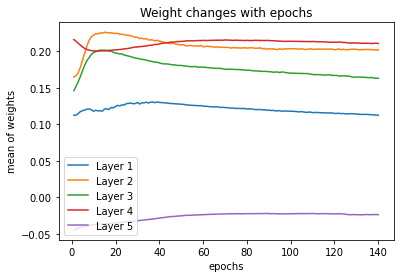

In [ ]:
plt.plot(epochs, wei1_mean)
plt.plot(epochs, wei2_mean)
plt.plot(epochs, wei3_mean)
plt.plot(epochs, wei4_mean)
plt.plot(epochs, wei5_mean)
plt.legend(labels=('Layer 1','Layer 2','Layer 3','Layer 4','Layer 5'))
plt.title('Weight changes with epochs')
plt.xlabel('epochs')
plt.ylabel('mean of weights')
plt.show()

In [11]:
m=[0]
v=[0]
print((weight1[1][0]-weight1[0][0])/(-0.001))

[[-13.907521    28.23533     -5.5451436    4.5232773  -12.759033  ]
 [-14.237433    27.826845    -4.717648     6.019488   -13.244321  ]
 [-11.99907     28.046606   -10.798096    -2.0210369   -9.49955   ]
 [-14.650523    26.133953    -3.2623706    5.23895    -14.278352  ]
 [-13.845264    30.081219    -0.65183634   8.712917   -14.527738  ]
 [-14.638632    29.283642    -2.7903316    7.18826    -14.531865  ]
 [ -9.120464   -12.133597    -7.582843     7.137075     0.65195554]]


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import randint

# 데이터 로드
tf.random.set_seed(3)

df=pd.read_csv("drive/MyDrive/Colab Notebooks/Admission_Predict.csv")
X = df.iloc[:, 1:8]
Y = df.iloc[:, 9]

# 데이터 전처리
X_scaled= MinMaxScaler().fit_transform(X)

# 훈련셋, 시험셋 나누기(랜덤서치를 이용한 교차검증 수행 예정)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y, test_size=0.1, random_state=35)

# 모델 설정
def build_classifier(node1, node2, node3, activation, optimizer):
    model = keras.Sequential()
    model.add(keras.layers.Dense(node1, activation=activation, input_dim=7))
    model.add(keras.layers.Dense(node2,activation=activation))
    model.add(keras.layers.Dense(node3,activation=activation))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn = build_classifier)

# RandomSearch 파라미터 설정
batch_size = randint(20, 50)
node1 = randint(5,50)
node2 = randint(5,50)
node3 = randint(5,50)
epochs = randint(50,1000)
activation = ['relu', 'sigmoid']
optimizer = ['sgd', 'adagrad', 'rmsprop', 'adam', 'nadam']

param_grid = dict(batch_size=batch_size, node1=node1, node2=node2, node3=node3, activation=activation, optimizer=optimizer, epochs=epochs)

# 랜덤서치 적용
rs = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring='accuracy',
                         cv=4, n_jobs=-1, verbose=0, return_train_score=True, random_state=35)
history=rs.fit(train_input, train_target)

# 최상의 교차 검증 정확도와 최적 파라미터 출력

print(f"Best: {history.best_score_} using {history.best_params_}")

# 랜덤서치의 최적 파라미터를 적용한 새로운 모델 구축
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=35)

model = keras.Sequential()
model.add(keras.layers.Dense(history.best_params_['node1'], activation=history.best_params_['activation'], input_dim=7))
model.add(keras.layers.Dense(history.best_params_['node2'], activation=history.best_params_['activation']))
model.add(keras.layers.Dense(history.best_params_['node3'], activation=history.best_params_['activation']))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=history.best_params_['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

#checkpoint_cb = callbacks.ModelCheckpoint('best-model.h5')
#early_stopping_cb = callbacks.EarlyStopping(monitor='loss', patience=2, verbose=0, mode="auto", restore_best_weights=True)

model_final=model.fit(train_input, train_target, epochs=history.best_params_['epochs'],
                     batch_size=history.best_params_['batch_size'], validation_data=(val_input, val_target))#, callbacks=[early_stopping_cb])
#print(early_stopping_cb.stopped_epoch)

# 모델 평가
model.evaluate(test_input, test_target)

# 정확도, 손실 그래프 그리기
import matplotlib.pyplot as plt

history_dict = model_final.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

loss_ax = plt.subplot()
acc_ax = loss_ax.twinx()

loss_ax.plot(epochs, loss, 'y', label='Training loss')
loss_ax.plot(epochs, val_loss, 'r', label='validation loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(epochs, acc, 'b', label='Training acc')
acc_ax.plot(epochs, val_acc, 'g', label='validation acc')
acc_ax.legend(loc='upper right')

plt.title('Accuracy and loss changes with epochs')
loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')
plt.show()

Epoch 1/500
48/48 [==============================] - 1s 8ms/step - loss: 0.6854 - accuracy: 0.6583 - val_loss: 0.6683 - val_accuracy: 0.7250
Epoch 2/500
48/48 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.6625 - val_loss: 0.6464 - val_accuracy: 0.7250
Epoch 3/500
48/48 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6625 - val_loss: 0.5995 - val_accuracy: 0.7250
Epoch 4/500
48/48 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6625 - val_loss: 0.5454 - val_accuracy: 0.7250
Epoch 5/500
48/48 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.6625 - val_loss: 0.4964 - val_accuracy: 0.7250
Epoch 6/500
48/48 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.6625 - val_loss: 0.4479 - val_accuracy: 0.7250
Epoch 7/500
48/48 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.6792 - val_loss: 0.4093 - val_accuracy: 0.7500
Epoch 8/500
4

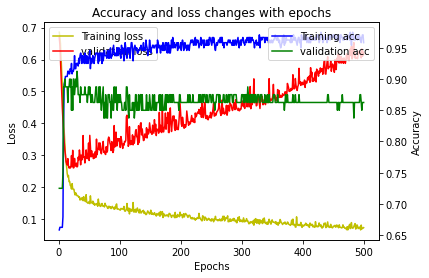

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 로드
tf.random.set_seed(3)

df=pd.read_csv("drive/MyDrive/Colab Notebooks/Admission_Predict.csv")
X = df.iloc[:, 1:8]
Y = df.iloc[:, 9]

# 데이터 전처리
X_scaled= MinMaxScaler().fit_transform(X)

# 훈련셋, 시험셋 나누기(랜덤서치를 이용한 교차검증 수행 예정)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y, test_size=0.2, random_state=35)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.25, random_state=35)

model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_dim=7))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

history = model.fit(train_input, train_target, epochs=500, batch_size=5, validation_data=(val_input, val_target))

# 모델 평가
model.evaluate(test_input, test_target)

# 정확도, 손실 그래프 그리기
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

loss_ax = plt.subplot()
acc_ax = loss_ax.twinx()

loss_ax.plot(epochs, loss, 'y', label='Training loss')
loss_ax.plot(epochs, val_loss, 'r', label='validation loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(epochs, acc, 'b', label='Training acc')
acc_ax.plot(epochs, val_acc, 'g', label='validation acc')
acc_ax.legend(loc='upper right')

plt.title('Accuracy and loss changes with epochs')
loss_ax.set_xlabel('Epochs')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')
plt.show()